In [2]:
import numpy as np 
import pandas as pd
import scipy
from pandas.plotting import scatter_matrix
import sklearn
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris=datasets.load_iris()

# Forming the iris dataframe
my_data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
my_data = pd.read_csv(iris.csv)
my_data[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
my_data.size

900

In [8]:
my_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
my_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
my_data.drop(['Id'],axis=1, inplace=True)

In [11]:
my_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


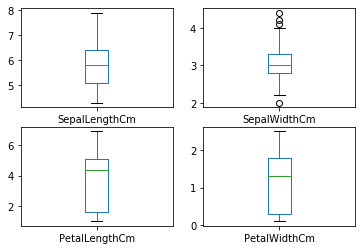

In [12]:
# box and whisker plots
my_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

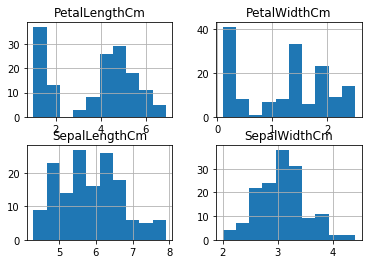

In [13]:
# histograms
my_data.hist()
plt.show()

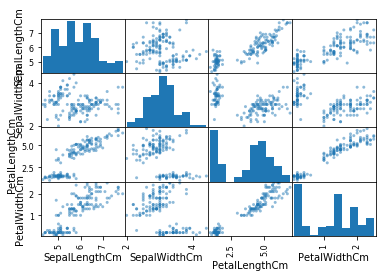

In [14]:
# scatter plot matrix
scatter_matrix(my_data)
plt.show()

In [15]:
# Split-out validation dataset
array = my_data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [16]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('validation set:', X_validation.shape,  Y_validation.shape)

Train set: (120, 4) (120,)
validation set: (30, 4) (30,)


In [17]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
drugTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
predTree = drugTree.predict(X_validation)

In [20]:
print (predTree [0:5])
print (Y_validation [0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica']


In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_validation, predTree))

DecisionTrees's Accuracy:  0.9


In [22]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

C:\Users\DIVESH\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


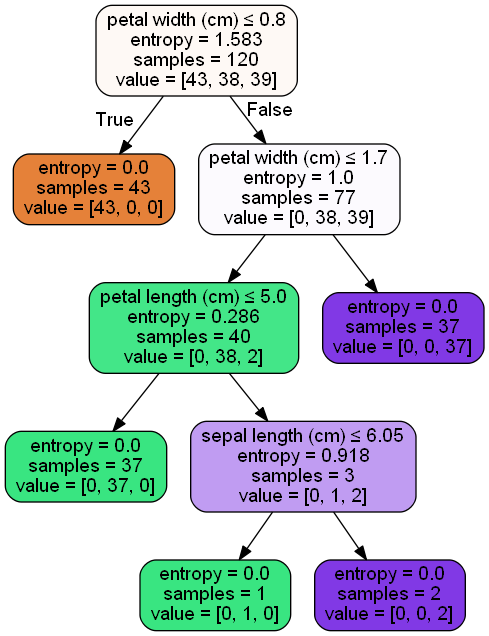

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(drugTree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())